In [97]:
import pandas as pd
import numpy as np

In [98]:
df=pd.read_csv('churn.csv')
df.sample(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
735,7595-EHCDL,Male,0,Yes,Yes,32,No,No phone service,DSL,No,...,Yes,No,Yes,Yes,Month-to-month,No,Credit card (automatic),50.60,1653.45,No
3502,6738-ISCBM,Male,0,No,No,44,No,No phone service,DSL,Yes,...,Yes,No,Yes,Yes,One year,Yes,Electronic check,54.00,2440.25,No
5216,3034-ZBEQN,Female,0,Yes,No,48,No,No phone service,DSL,No,...,Yes,No,No,No,One year,No,Mailed check,34.70,1604.5,Yes
1522,5766-XQXMQ,Female,0,No,No,29,Yes,No,DSL,Yes,...,Yes,No,No,Yes,Month-to-month,Yes,Bank transfer (automatic),68.85,1970.5,Yes
1672,4737-AQCPU,Male,0,Yes,Yes,72,Yes,Yes,DSL,Yes,...,Yes,Yes,No,No,Two year,No,Credit card (automatic),72.10,5016.65,No
2999,1038-RQOST,Male,0,Yes,Yes,19,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.60,414.95,No
1256,2226-ICFDO,Female,0,Yes,Yes,72,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),85.90,6110.75,No
1211,1373-ORVIZ,Female,0,Yes,Yes,11,Yes,Yes,DSL,No,...,No,Yes,No,Yes,Month-to-month,Yes,Electronic check,66.35,740.8,Yes
6895,5126-RCXYW,Male,0,Yes,Yes,54,No,No phone service,DSL,No,...,Yes,Yes,No,Yes,Two year,No,Credit card (automatic),46.00,2424.05,No
688,0946-FKYTX,Male,0,No,No,52,No,No phone service,DSL,No,...,No,No,No,No,One year,No,Mailed check,30.10,1623.4,No


In [99]:




df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]
inputs.iloc[488].TotalCharges

' '

In [100]:
df[df.TotalCharges!=' '].shape

(7032, 21)

In [101]:
df1=df[df.TotalCharges!=' ']
df1.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [124]:
df1.TotalCharges=pd.to_numeric(df1.TotalCharges)
df1.dtypes

C:\Users\AKASH\AppData\Local\Temp\ipykernel_17640\3322610000.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges=pd.to_numeric(df1.TotalCharges)


gender                 int64
SeniorCitizen          int64
Partner                int64
Dependents             int64
tenure                 int64
PhoneService           int64
MultipleLines          int64
OnlineSecurity         int64
OnlineBackup           int64
DeviceProtection       int64
TechSupport            int64
StreamingTV            int64
StreamingMovies        int64
PaperlessBilling       int64
MonthlyCharges       float64
TotalCharges         float64
Churn                  int64
InternetService_n      int32
Contract_n             int32
PaymentMethod_n        int32
dtype: object

In [125]:
def print_unique_col_values(df):
    for columns in df:
        if df[columns].dtypes=='object':
            print(f'{columns}:{df[columns].unique()}')

In [127]:
print_unique_col_values(df1)

In [128]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)


C:\Users\AKASH\AppData\Local\Temp\ipykernel_17640\2589434152.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service','No',inplace=True)
C:\Users\AKASH\AppData\Local\Temp\ipykernel_17640\2589434152.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service','No',inplace=True)


In [130]:
print_unique_col_values(df1)

In [131]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes':1,'No':0},inplace=True)

C:\Users\AKASH\AppData\Local\Temp\ipykernel_17640\1634021245.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1[col].replace({'Yes':1,'No':0},inplace=True)
C:\Users\AKASH\AppData\Local\Temp\ipykernel_17640\1634021245.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col].replace({'Yes':1,'No':0},inplace=True)


In [132]:
df1.dtypes

gender                 int64
SeniorCitizen          int64
Partner                int64
Dependents             int64
tenure                 int64
PhoneService           int64
MultipleLines          int64
OnlineSecurity         int64
OnlineBackup           int64
DeviceProtection       int64
TechSupport            int64
StreamingTV            int64
StreamingMovies        int64
PaperlessBilling       int64
MonthlyCharges       float64
TotalCharges         float64
Churn                  int64
InternetService_n      int32
Contract_n             int32
PaymentMethod_n        int32
dtype: object

In [133]:
df1['gender'].replace({'Male':1,'Female':0},inplace=True)
df1.dtypes

C:\Users\AKASH\AppData\Local\Temp\ipykernel_17640\707927458.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['gender'].replace({'Male':1,'Female':0},inplace=True)
C:\Users\AKASH\AppData\Local\Temp\ipykernel_17640\707927458.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['gender'].replace({'Male':1,'Female':0},inplace=True)


gender                 int64
SeniorCitizen          int64
Partner                int64
Dependents             int64
tenure                 int64
PhoneService           int64
MultipleLines          int64
OnlineSecurity         int64
OnlineBackup           int64
DeviceProtection       int64
TechSupport            int64
StreamingTV            int64
StreamingMovies        int64
PaperlessBilling       int64
MonthlyCharges       float64
TotalCharges         float64
Churn                  int64
InternetService_n      int32
Contract_n             int32
PaymentMethod_n        int32
dtype: object

In [116]:
df1.drop('customerID',axis='columns',inplace=True)

C:\Users\AKASH\AppData\Local\Temp\ipykernel_17640\2082743622.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop('customerID',axis='columns',inplace=True)


In [117]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [123]:
from sklearn.preprocessing import LabelEncoder
le_InternetService=LabelEncoder()
le_Contract=LabelEncoder()
le_PaymentMethod=LabelEncoder()
df1['InternetService_n']=le_InternetService.fit_transform(df1['InternetService'])
df1['Contract_n']=le_Contract.fit_transform(df1['Contract'])
df1['PaymentMethod_n']=le_PaymentMethod.fit_transform(df1['PaymentMethod'])
df1.head()

KeyError: 'InternetService'

In [122]:
df1.drop(['InternetService','Contract','PaymentMethod'],axis='columns',inplace=True)


KeyError: "['InternetService', 'Contract', 'PaymentMethod'] not found in axis"

In [134]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_n,Contract_n,PaymentMethod_n
0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,0,0,0,2
1,1,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.50,0,0,1,3
2,1,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,1,0,0,3
3,1,0,0,0,45,0,0,1,0,1,1,0,0,0,42.30,1840.75,0,0,1,0
4,0,0,0,0,2,1,0,0,0,0,0,0,0,1,70.70,151.65,1,1,0,2


In [137]:
cols_to_scale=['tenure','MonthlyCharges','TotalCharges']
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df1[cols_to_scale]=scaler.fit_transform(df1[cols_to_scale])
df1.head()

C:\Users\AKASH\AppData\Local\Temp\ipykernel_17640\3880953831.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[cols_to_scale]=scaler.fit_transform(df1[cols_to_scale])


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_n,Contract_n,PaymentMethod_n
0,0,0,1,0,0.000000,0,0,0,1,0,0,0,0,1,0.115423,0.001275,0,0,0,2
1,1,0,0,0,0.464789,1,0,1,0,1,0,0,0,0,0.385075,0.215867,0,0,1,3
2,1,0,0,0,0.014085,1,0,1,1,0,0,0,0,1,0.354229,0.010310,1,0,0,3
3,1,0,0,0,0.619718,0,0,1,0,1,1,0,0,0,0.239303,0.210241,0,0,1,0
4,0,0,0,0,0.014085,1,0,0,0,0,0,0,0,1,0.521891,0.015330,1,1,0,2


In [139]:
X=df1.drop('Churn',axis='columns')
y=df1.Churn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.2,random_state=5)

In [140]:
X_train.shape

(5625, 19)

In [141]:
len(X_train.columns)

19

In [142]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense

In [149]:
model=keras.Sequential([
    keras.layers.Dense(15,input_shape=(19,),activation='relu'),
    keras.layers.Dense(7,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid'),
])
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(X_train,y_train,epochs=100)

Epoch 1/100
176/176 [==============================] - 0s 1ms/step - loss: 0.5242 - accuracy: 0.7396
Epoch 2/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4555 - accuracy: 0.7712
Epoch 3/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4362 - accuracy: 0.7886
Epoch 4/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4280 - accuracy: 0.7938
Epoch 5/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4243 - accuracy: 0.7952
Epoch 6/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4222 - accuracy: 0.7968
Epoch 7/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4190 - accuracy: 0.7995
Epoch 8/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4174 - accuracy: 0.8018
Epoch 9/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4165 - accuracy: 0.8023
Epoch 10/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4145 - accura

In [150]:
model.evaluate(X_test,y_test)

44/44 [==============================] - 0s 984us/step - loss: 0.4580 - accuracy: 0.7811


[0.4580099880695343, 0.7810945510864258]

In [151]:
yp=model.predict(X_test)
y_pred=[]
for i in yp:
    if i>0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

44/44 [==============================] - 0s 835us/step


In [152]:
y_pred[:5]

[0, 1, 0, 1, 1]

Text(70.72222222222221, 0.5, 'Truth')

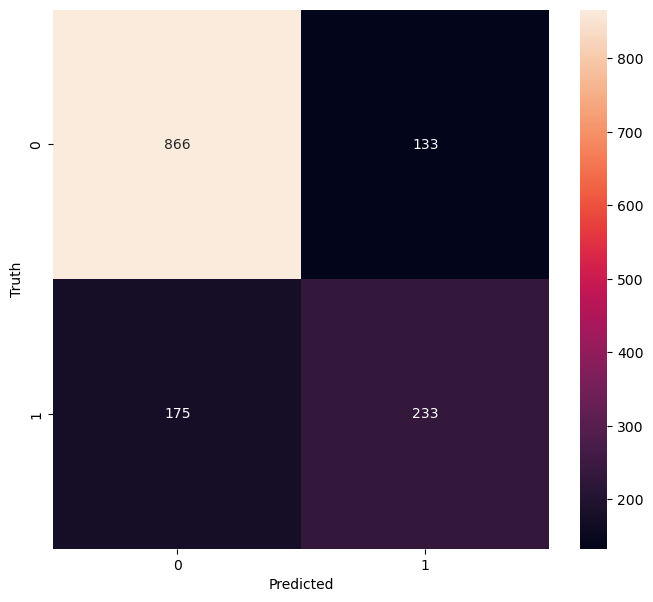

In [156]:
import seaborn as sn
from matplotlib import pyplot as plt
%matplotlib inline
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (8,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')